In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc
#import scipy as sp
import scipy.stats as sp
import scipy as sc
import math
import numpy as np
import networkx as nx

# NPN

In [102]:
def huge_npn(x,npn_func = "shrinkage",npn_thresh= None,verbose=True):
    """Implements the Gausianization to help relax the assumption of normality
    as in paper 'The Nonparanormal:Semiparametric Estimation
    of High Dimensional Undirected Graphs' Liu et.al 2009"""
    n,d = x.shape
    x_col = list(x.columns)
    x_row = list(x.index)
    if npn_func == "shrinkage":
        if verbose==True:
            print("Conducting the nonparanormal (npn) transformation via shrunkun ECDF..")
        x= sp.norm.ppf(x.apply(sp.rankdata)/(n+1))
        x = pd.DataFrame(x,columns=x_col,index=x_row)
        x = x/x.ix[:,0].std()
        if verbose==True:
            print("done.\\n")
        del(n,d,verbose)
        gc.collect()
        x.columns=x_col
        x.index = x_row
    if (npn_func =="truncation"):
        if verbose==True:
            print("Conducting nonparanormal (npn) transformation via truncated ECDF")
        if npn_thresh == None:
            npn_thresh = 1/(4*(n**0.25)* math.sqrt(math.pi*math.log(n)))
        x = sp.norm.ppf(np.minimum(np.maximum(x.apply(sp.rankdata)/n,npn_thresh),
                        1-npn_thresh))
        x = pd.DataFrame(x,columns=x_col,index=x_row)
        x = x/x.ix[:,0].std()
        if verbose== True:
            print("done.\\n")
        del(n,d,verbose)
        gc.collect()
        x.columns=x_col
        x.index = x_row
    if npn_func =="skeptic":
        if verbose == True:
            print("Conducting nonparanormal (npn) transformation via skeptic ..")
        rho, pval = sp.spearmanr(x, axis=0)    
        x = np.multiply(2,np.sin(np.multiply(math.pi/6 ,rho)))
        x = pd.DataFrame(x,columns=x_col)
        if verbose==True:
            print("done.\\n")
        del(n,d,verbose)
        gc.collect()
        x.columns=x_col
    return(x)
            

# Generate Random Graph 

In [205]:
def wgtMatrix(g,transpose=True):
    res =nt.adjacency_matrix(g, nodelist=None)
    res =res.todense()
    if transpose ==True:
        res=np.transpose(res)
    else: res
    return(res)

In [221]:
def trueCov(dag):
    wm = wgtMatrix(dag)
    p = len(dag.nodes())
    diag = np.zeros((p, p), int)
    np.fill_diagonal(diag, 1)
    mat =np.linalg.inv(diag-wm)
    cov=np.matmul(mat,np.transpose(mat))
    return(cov)

In [333]:
def erDAG(n,p):
    """Generate Random Erdos Graph as in
    Erdős and A. Rényi, On Random Graphs, Publ. Math. 6, 290 (1959)"""
    mat = np.empty((n,n,))
    mat[:] = np.nan
    Q = np.triu(mat,1)
    Q[np.isnan(Q)] = np.random.binomial(1, p, (n-1)*n/2)
    return(Q)

In [338]:
def randDAG(n,p):
    amat= erDAG(n,p)
    G=nx.from_numpy_matrix(amat,create_using=nx.DiGraph())
    result ={"amat":amat,"G":G}
    return(result)

# GAUSSCITEST

In [ ]:
def gaussCItest(x,y,S,suffStat):
    

In [ ]:
def zStat(x,y,S,C,n):
    

In [ ]:
def pcorOrder(i,j,k,C,cut_at=0.9999999):
    if(length(k)==0):
        r= C[i,j]
    elif length(k) ==1:
        r = C[i,j] - C[i,k] *C[j,k]/math.sqrt((1-C[j,k])*(1-C[i,k]**2))
    else:
        PM = np.linalg.pinv(C[[]i,j,k],[i,j,k])
        r = -PM[1,2]/math.sqrt(PM[1,1]*PM[2,2])
    if r = np.nan:
        0
    else:
        min(cut_at,max(-cut.at,r))
            

In [ ]:
def simulateVAR(coefMatr=NULL,intercept,size,burn=100,Sigma,error.dist=c("normal","t"),df=NULL,checkCausal=TRUE){
	error.dist  = match.arg(error.dist)
	if(!is.null(coefMatr)) {coefMatr = as.matrix(coefMatr)}
	inteVect    = intercept
#	inteVect    = matrix(inteVect,ncol=1) Command was in actual code
	K           = nrow(Sigma)
	print(K)
	if(error.dist=="t"){
		if(is.null(df)|df<=2) {stop("error: the d.f. of t-distribution is NULL or <=2")}
	}
	if (min(eigen(Sigma)$val)<0){stop("error: the covariance matrix is not positive-definite")}
	if (!is.null(coefMatr)){ 
		if(checkCausal & !companionVAR(coefMatr)$isCausal){stop("error: the VAR model is non-causal")}
	}
	S.scale        = diag(NA,K) 
	if(error.dist=="t") {S.scale = Sigma*(df-2)/df}
	if (!is.null(coefMatr)) {p = ncol(coefMatr)/K} else {p=0}
	simData        = matrix(NA,nrow=K,ncol=size+burn)
	cholSigma      = t(chol(Sigma))
	if(p!=0){
		simData[,1:p]  = matrix(rnorm(K*p),nrow=K,ncol=p)
		for (i in (p+1):(size+burn)){
			if (error.dist=="normal") {error = cholSigma %*% matrix(rnorm(K),ncol=1)}
			if (error.dist=="t")      {error = matrix(rmt(n=1,rep(0,K),S.scale,df),ncol=1)}
			simData[,i] = inteVect + coefMatr %*% matrix(c(simData[,(i-1):(i-p)]),ncol=1) + error
	}}
	if(p==0){
		for (i in (p+1):(size+burn)){
			if (error.dist=="normal") {error = cholSigma %*% matrix(rnorm(K),ncol=1)}
			if (error.dist=="t")      {error = matrix(rmt(n=1,rep(0,K),S.scale,df),ncol=1)}
			simData[,i] = inteVect + error
	}}
	simData  = t(simData[,(1+burn):(size+burn)])
	result   = list(simData=simData,coefMatr=coefMatr,inteVect=inteVect,K=K,p=p,size=size,checkCausal=checkCausal,Sigma=Sigma,error.dist=error.dist,df=df)
	return(result)
 }

# Example of changing truecov function

In [269]:
A=np.matrix([[0,0,1,1,0,1],
           [0,0,1,1,0,1],
           [0,0,0,0,1,0],
           [0,0,0,0,1,1],
           [0,0,0,0,0,0],
            [0,0,0,0,0,0]])
G=nx.from_numpy_matrix(A,create_using=nx.DiGraph())
trueCov(G)

matrix([[  1.,   0.,   1.,   1.,   2.,   2.],
        [  0.,   1.,   1.,   1.,   2.,   2.],
        [  1.,   1.,   3.,   2.,   5.,   4.],
        [  1.,   1.,   2.,   3.,   5.,   5.],
        [  2.,   2.,   5.,   5.,  11.,   9.],
        [  2.,   2.,   4.,   5.,   9.,  10.]])

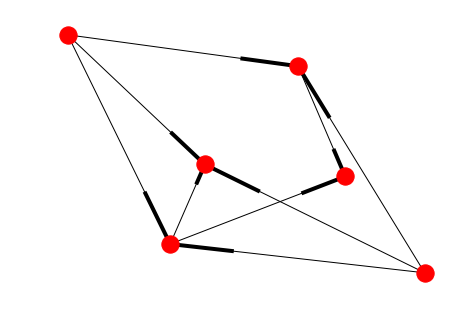

In [268]:
nx.draw(G)
plt.show()

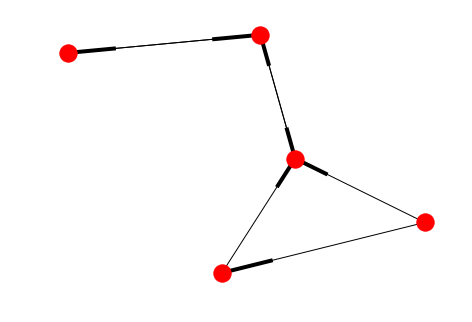

In [273]:
g= nx.gnp_random_graph(5, 0.4, seed=10, directed=True)
nx.draw(g)
plt.show()

In [ ]:
nx.draw(randDAG(5,0.2)["G"])
plt.show()